In [0]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# Importing datasets

In [0]:
df_gcn = pd.read_csv('wandb_export_GCN_sweep.csv')
df_gat = pd.read_csv('wandb_export_GAT_sweep.csv')

In [0]:
df_gat

# GCN models

In [0]:
# Find the standard deviation over folds
df_gcn['cv_mse_mean'] = df_gcn['cv_validation_average_mse']
df_gcn['cv_mse_std'] = df_gcn[['final_validation_mse_fold_{}'.format(i) for i in range(5)]].std(axis=1)

In [32]:
df_gcn.loc[11, ['cv_mse_mean', 'cv_mse_std']]

cv_mse_mean     30.0235
cv_mse_std     0.767439
Name: 11, dtype: object

In [0]:
min_loss_idx = df_gcn['cv_mse_mean'].argmin()
min_loss_high_error = df_gcn.loc[min_loss_idx, 'cv_mse_mean'] + df_gcn.loc[min_loss_idx, 'cv_mse_std']

In [45]:
df_gcn[df_gcn['cv_mse_mean'] - df_gcn['cv_mse_std'] <= min_loss_high_error][['Name', 'cv_mse_mean', 'cv_mse_std']]

,Name,cv_mse_mean,cv_mse_std
0,summer-sweep-50-fold-4,28.045074,0.594661
1,flowing-sweep-61-fold-4,28.372438,0.337489
2,electric-sweep-30-fold-4,28.523596,0.299467
3,youthful-sweep-77-fold-4,28.853450,1.017336
4,scarlet-sweep-74-fold-4,28.875277,0.469869
5,young-sweep-17-fold-4,29.020517,0.806356
8,dainty-sweep-46-fold-4,29.491114,0.883251


In [60]:
df_gcn_filtered = df_gcn[df_gcn['cv_mse_mean'] - df_gcn['cv_mse_std'] <= min_loss_high_error].copy()
df_gcn_filtered['id'] = df_gcn_filtered.index
df_gcn_filtered

,Name,learning_rate,similarity,layer_sizes,weight_decay,n_conv_layers,dropout,_wandb,validation_r2_fold_4,cv_validation_average_r,train_mse_fold_0,final_validation_mse_fold_2,final_validation_r_fold_4,final_validation_r2_fold_1,train_r_fold_4,train_r2_fold_0,train_mse_fold_2,cv_validation_average_mse,validation_r2_fold_1,train_r_fold_2,final_validation_r2_fold_0,final_validation_r_fold_0,train_r_fold_3,train_mse_fold_1,train_r2_fold_3,validation_mse_fold_1,train_r2_fold_4,final_validation_r2_fold_2,train_r2_fold_2,train_mse_fold_4,validation_r_fold_0,validation_r_fold_2,cv_validation_average_r2,validation_r_fold_3,validation_mse_fold_2,final_validation_r_fold_1,final_validation_mse_fold_3,train_r2_fold_1,train_mse_fold_3,validation_mse_fold_4,validation_r_fold_1,final_validation_mse_fold_4,final_validation_r2_fold_4,train_r_fold_0,train_r_fold_1,final_validation_mse_fold_0,validation_r2_fold_0,validation_r2_fold_3,validation_r_fold_4,validation_mse_fold_0,final_validation_mse_fold_1,final_validation_r_fold_2,validation_r2_fold_2,final_validation_r_fold_3,final_validation_r2_fold_3,validation_mse_fold_3,cv_mse_mean,cv_mse_std,id
0,summer-sweep-50-fold-4,0.006984,"(['SEX', 'ICD10', 'FI', 'FTE', 'MEM'], 0.9)","[1024, 512, 512, 256, 256, 1]",0.013118,5,0.321941,NaN,0.173922,"[0.7098480072291622,0]",12.939878,27.113853,"[0.7095156613468097,0]",0.505831,0.748599,0.768318,54.350365,28.045074,-1.293080,0.535141,0.491007,"[0.7088091970691921,0]",0.672535,124.199135,0.314513,129.051559,0.527163,0.508482,0.029678,26.335983,0.682671,0.397349,0.497756,0.494471,70.512299,"[0.7158250002032253,0]",28.585442,-1.228428,38.337082,46.613342,-0.047864,28.305063,0.498380,0.890846,-0.024127,28.409805,0.453649,-0.076939,0.550183,30.494959,27.811209,"[0.7138105142100741,0]",-0.278243,"[0.7012796633165099,0]",0.485083,59.785851,28.045074,0.594661,0
1,flowing-sweep-61-fold-4,0.006187,"(['SEX', 'ICD10', 'MEM', 'FTE'], 0.8)","[1024, 512, 512, 512, 256, 256, 1]",0.002084,3,0.042080,NaN,0.469902,"[0.7042792789490768,0]",1.317449,27.838068,"[0.7066580580068083,0]",0.497622,0.988745,0.976412,1.574710,28.372438,0.384772,0.985950,0.486051,"[0.7040143790577951,0]",0.959944,5.677608,0.912390,34.624245,0.977471,0.495353,0.971887,1.254794,0.696924,0.695189,0.491880,0.672954,29.588037,"[0.7054645838517555,0]",28.604811,0.898130,4.899768,29.912018,0.652325,28.459700,0.495640,0.988516,0.947742,28.686419,0.465736,0.444182,0.696152,29.820312,28.273195,"[0.7061591373231205,0]",0.463630,"[0.6991002365059049,0]",0.484734,30.856045,28.372438,0.337489,1
2,electric-sweep-30-fold-4,0.005095,"(['SEX', 'ICD10', 'MEM', 'FTE'], 0.8)","[1024, 512, 256, 128, 128, 1]",0.016171,1,0.048596,NaN,-0.190228,"[0.7007915945877421,0]",13.561369,28.717859,"[0.7035426669499019,0]",0.499122,0.738431,0.757191,17.176512,28.523596,-0.138297,0.834537,0.494568,"[0.7037947355800219,0]",0.833661,42.132824,0.694215,64.061882,0.308511,0.479404,0.693346,38.514439,0.650163,0.664584,0.489144,0.622400,31.885920,"[0.7074797532704962,0]",28.685137,0.244037,17.101564,67.161369,0.383994,28.815231,0.489339,0.872331,0.594670,28.211016,0.359814,0.356991,0.517583,35.732410,28.188738,"[0.6932982696393085,0]",0.421974,"[0.6958425474989822,0]",0.483287,35.696411,28.523596,0.299467,2
3,youthful-sweep-77-fold-4,0.004731,"(['SEX', 'ICD10', 'MEM', 'FI'], 0.8)","[512, 512, 512, 256, 128, 1]",0.002517,2,0.237940,NaN,0.218647,"[0.7000994553788613,0]",13.484721,27.403358,"[0.7061104958807551,0]",0.470478,0.877916,0.758563,16.809092,28.853450,0.141928,0.862098,0.465055,"[0.6846188494241552,0]",0.889255,17.528561,0.760037,48.291164,0.739064,0.503234,0.699906,14.533584,0.559467,0.606587,0.483329,0.612950,44.695816,"[0.695458112066512,0]",28.646301,0.685496,13.420350,44.089657,0.558903,28.558485,0.493889,0.878805,0.848886,29.858328,0.226476,0.257681,0.604276,43.174793,29.800779,"[0.7122666151406618,0]",0.189757,"[0.7020432043822225,0]",0.483986,41.209572,28.853450,1.017336,3
4,scarlet-sweep-74-fold-4,0.015796,"(['SEX', 'ICD10', 'M

In [0]:
folds = ['final_validation_mse_fold_{}'.format(i) for i in range(5)]
df_gcn_filtered_melted = pd.melt(df_gcn_filtered, id_vars=['id'], value_vars=folds)

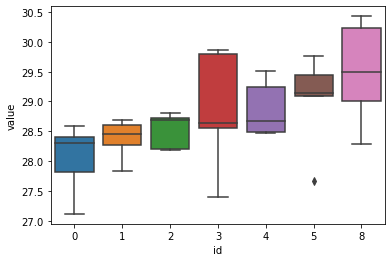

In [66]:
fig, ax = plt.subplots()
# fig.set_size_inches(11.7, 8.27)

ax = sns.boxplot(x="id", y="value", data=df_gcn_filtered_melted, ax=ax)

# GAT models

In [0]:
# Find the standard deviation over folds
df_gat['cv_mse_mean'] = df_gat['cv_validation_average_mse']
df_gat['cv_mse_std'] = df_gat[['final_validation_mse_fold_{}'.format(i) for i in range(5)]].std(axis=1)

In [0]:
gat_min_loss_idx = df_gat['cv_mse_mean'].argmin()
gat_min_loss_high_error = df_gat.loc[gat_min_loss_idx, 'cv_mse_mean'] + df_gat.loc[gat_min_loss_idx, 'cv_mse_std']

In [71]:
df_gat[df_gat['cv_mse_mean'] - df_gat['cv_mse_std'] <= gat_min_loss_high_error][['Name', 'cv_mse_mean', 'cv_mse_std']]

,Name,cv_mse_mean,cv_mse_std
0,summer-sweep-29-fold-4,27.543018,0.757831
1,different-sweep-7-fold-4,28.107559,0.787149
2,bumbling-sweep-16-fold-4,28.207404,0.182981
3,prime-sweep-6-fold-4,28.425118,0.458002
4,fluent-sweep-26-fold-4,28.561369,0.760319
5,blooming-sweep-24-fold-4,28.822765,0.694876
6,copper-sweep-9-fold-4,28.848512,0.900478
7,stellar-sweep-27-fold-4,28.859661,0.941607
8,sunny-sweep-23-fold-4,28.981194,0.739823


In [73]:
df_gat_filtered = df_gat[df_gat['cv_mse_mean'] - df_gat['cv_mse_std'] <= gat_min_loss_high_error].copy()
df_gat_filtered['id'] = df_gat_filtered.index
df_gat_filtered

,Name,dropout,weight_decay,learning_rate,n_conv_layers,similarity,layer_sizes,_wandb,final_validation_r_fold_2,final_validation_mse_fold_1,train_r_fold_3,train_r2_fold_0,validation_r_fold_2,train_r_fold_4,train_mse_fold_4,final_validation_r2_fold_0,final_validation_r2_fold_3,validation_mse_fold_1,validation_mse_fold_4,final_validation_r_fold_0,validation_r2_fold_3,train_r2_fold_3,validation_r2_fold_2,train_mse_fold_2,cv_validation_average_r2,final_validation_mse_fold_3,train_mse_fold_1,final_validation_mse_fold_4,train_r2_fold_4,validation_r_fold_0,validation_r_fold_3,cv_validation_average_mse,train_r2_fold_2,final_validation_r_fold_4,validation_r_fold_1,validation_r2_fold_4,validation_mse_fold_2,final_validation_r2_fold_4,final_validation_mse_fold_0,validation_r_fold_4,train_r_fold_1,cv_validation_average_r,final_validation_r2_fold_1,final_validation_r2_fold_2,train_r_fold_0,train_mse_fold_0,validation_mse_fold_3,final_validation_mse_fold_2,final_validation_r_fold_3,train_r2_fold_1,final_validation_r_fold_1,validation_r2_fold_1,train_mse_fold_3,train_r_fold_2,validation_r2_fold_0,validation_mse_fold_0,cv_mse_mean,cv_mse_std,id
0,summer-sweep-29-fold-4,0.003142,0.000605,0.013365,2,"(['SEX', 'ICD10', 'MEM', 'FI'], 0.8)","[2048, 1024, 512, 256, 128, 1]",NaN,"[0.7258302086136431,0]",27.894621,0.831606,0.819984,0.672752,0.935659,7.218294,0.501500,0.513961,32.671867,32.714664,"[0.7124621502665447,0]",0.170657,0.684724,0.430460,8.113339,0.506814,26.982281,5.228909,28.449776,0.870403,0.654600,0.537721,27.543018,0.855152,"[0.7063399389719577,0]",0.687471,0.420234,31.417810,0.495816,27.824137,0.681751,0.957654,"[0.7164901502540398,0]",0.504348,0.518444,0.905669,10.054255,46.040649,26.564274,"[0.7226826311447551,0]",0.906181,"[0.7151358222732984,0]",0.419463,17.632347,0.925308,0.394347,33.804966,27.543018,0.757831,0
1,different-sweep-7-fold-4,0.306806,0.002071,0.001679,2,"(['SEX', 'ICD10', 'FI', 'FTE', 'MEM'], 0.9)","[1024, 512, 256, 128, 128, 1]",NaN,"[0.7156418650372596,0]",28.209438,0.862006,0.673152,0.601592,0.877881,16.759176,0.475565,0.494154,47.728992,45.718552,"[0.6912303742989633,0]",0.221760,0.692617,0.220319,16.588449,0.496645,28.081882,19.166834,27.901522,0.699105,0.567123,0.593713,28.107559,0.703845,"[0.7166997552245218,0]",0.562296,0.189780,43.009914,0.505532,29.271679,0.603797,0.846059,"[0.708441946455982,0]",0.498755,0.509217,0.840818,18.255093,43.203728,27.073273,"[0.711002296599681,0]",0.656101,"[0.707635441119485,0]",0.151917,17.190908,0.867931,0.191953,45.101715,28.107559,0.787149,1
2,bumbling-sweep-16-fold-4,0.104624,0.036676,0.003412,3,"(['SEX', 'ICD10', 'MEM', 'FI'], 0.8)","[1024, 512, 256, 128, 128, 1]",NaN,"[0.7026725092682169,0]",28.189878,0.796663,0.671242,0.524106,0.629560,34.910751,0.492180,0.487786,38.221107,49.138676,"[0.705132053737117,0]",0.278286,0.618218,-0.388852,59.739616,0.494816,28.435377,18.234089,28.069553,0.373212,0.628041,0.600744,28.207404,-0.066537,"[0.709862745981948,0]",0.617594,0.129169,76.613892,0.502554,28.344326,0.464511,0.827259,"[0.7064092308801392,0]",0.499102,0.492456,0.831884,18.361761,40.065670,27.997885,"[0.7060242905665377,0]",0.672837,"[0.7083545548468768,0]",0.320860,21.351851,0.631846,0.297744,39.196899,28.207404,0.182981,2
3,prime-sweep-6-fold-4,0.327091,0.001549,0.002482,2,"(['SEX', 'ICD10', 'FI', 'FTE', 'MEM'], 0.9)","[512, 512, 512, 256, 128, 1]",NaN,"[0.707052692540311,0]",27.988211,0.823676,0.664653,0.570087,0.870694,18.454224,0.477055,0.487522,48.368309,45.396038,"[0.6965821194076077,0]",0.180278,0.649708,0.206872,18.745281,0.490908,28.450043,20.334091,28.288332,0.668672,0.557878,0.538087,28.425118,0.665339,"[0.7131076241638924,0]",0.546416,0.195496,43.751698,0.498677,29.188517,0.601965,0.829680,"[0.7081650485135899,0]",0.502685,0.488602,0.846598,18.729795,45.506577,28.210487,"[0.7136404086576125,0]",0.635158,"[0.7104423977985255,0]",0.140557,19.590685,0.843027,0.172198,46.204323,28.425118,0.458002,3
4,fluent-sweep-26-fold-4,0.407471,0.006715,0.003246,3,"(['SEX', 'ICD1

In [0]:
folds = ['final_validation_mse_fold_{}'.format(i) for i in range(5)]
df_gat_filtered_melted = pd.melt(df_gat_filtered, id_vars=['id'], value_vars=folds)

In [77]:
sns.set(font_scale=1.5, rc={'text.usetex' : True})
fig, ax = plt.subplots()
# fig.set_size_inches(11.7, 8.27)

ax = sns.boxplot(x="id", y="value", data=df_gat_filtered_melted, ax=ax)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f0dff4f71e0> (for post_execute):


RuntimeError: ignored

RuntimeError: ignored

<Figure size 432x288 with 1 Axes>